In [1]:
# 1A.
# A normal distribution is where data trends around a central value, and the mean, median, and mode are all equal. 
# A z-score is how many standard deviations away from the mean a data point is.



In [1]:
#1B
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

#Required imports to use scipy and matplotlib to graph and calculate sigmas/probabilities for this Lab

In [19]:
x = stats.norm.cdf(1)
print(x)

y = stats.norm.cdf(2)
print(y)

z = stats.norm.cdf(3)
print(z)

#Used the cdf functions to calculate what percent of the data falls under 1, 2, and 3 sigma.

0.8413447460685429
0.9772498680518208
0.9986501019683699


In [20]:
#1C
x = stats.norm.ppf(.841)
print(x)
y = stats.norm.ppf(.977)
print(y)
z = stats.norm.ppf(.999)
print(z)

#Here, I plugged in the probabilities from the previous part into the ppf function to get the corresponding sigmas.

0.9985762706156592
1.9953933101678245
3.090232306167813


In [15]:
#1D
# You get a positive value of sigma when the probability is larger than 1/2. Negative sigma values
# correspond to probabilities less than 1/2 because we are integrating to the left (cdf and ppf commands)

In [17]:
#2A
# A log-normal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed.
# If X is a random variable, then the function Y = log(X) will obey a normal distribution.

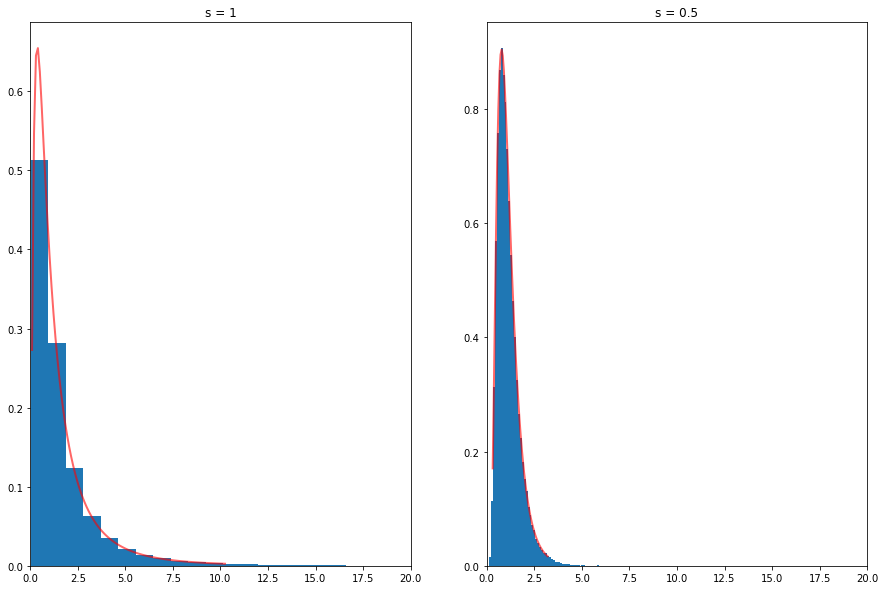

In [4]:
#2B
d = stats.lognorm.rvs(s = 1, size = 100000)
fig, ax = plt.subplots(1, 2)
s = 1
x = np.linspace(stats.lognorm.ppf(0.01, s),
                stats.lognorm.ppf(0.99, s), 100)
ax[0].set_xlim([0,20])
ax[0].set_title('s = 1')
ax[0].hist(d, 100, density=True)
ax[0].plot(x, stats.lognorm.pdf(x,s),
       'r-', lw=2, alpha = 0.6)

d2 = stats.lognorm.rvs(s = .5, size = 100000)
s2 = .5
x = np.linspace(stats.lognorm.ppf(.01, s2),
                stats.lognorm.ppf(.99, s2))
ax[1].set_xlim([0,20])
ax[1].set_title('s = 0.5')
ax[1].hist(d2,100, density=True)
ax[1].plot(x, stats.lognorm.pdf(x,s2),
       'r-', lw=2, alpha = 0.6)
plt.show()

# A lognormal distribution needs x > 0 (because log(x) must be positive) and s > 1. 
# As s decreases, the width of the probability distribution increases.

In [75]:
#3
# Using the s=1 distribution from the previous problem.
#A: Suppose we are observing strong lightning strikes using a detector. We only want to record lightning strikes that have a 
#   magnitude that is larger than 9 on the x-axis. 
#B: What is the probability that the candidate value of 9 was detected and it was not a reading of background noise?
#C: Use stats.sf to calculate the integral from 9 to positive infinity.
#D: 
d = stats.lognorm.rvs(s = 1, size = 100000)
s = 1
prob = stats.lognorm.sf(9, s)
print(prob)

# Calculating the probability that the background "noise" produced the detected signal.

0.014002205573945036


In [69]:
#E: 
s = 1
sigma = stats.norm.isf(prob, s)
print(sigma)

# Converting probability to the equivalent sigma.

3.19722457733622


0.04575380761048669


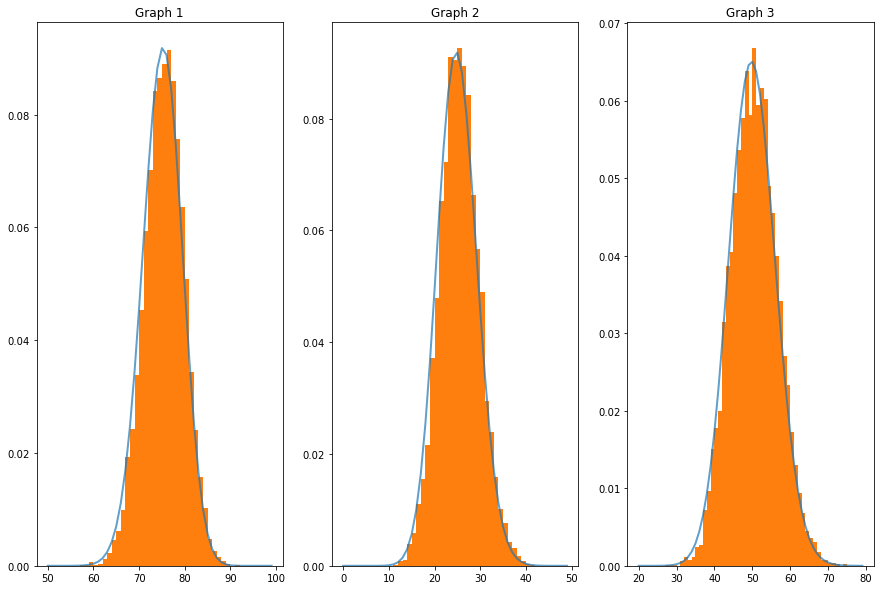

In [35]:
#Non-Continuous Distributions:
#A: The binomial distribution with parameters n and p, where there are n independent trials, each with a Boolean-value outcome of either success or
# failure. p is the probability of success for each trial. This distribution is commonly used to model the number of successes in a sample
# size of n (with replacement).

#B: 
# Creating 3 separate binomial distribution cases with differing n and p values.
a = stats.binom.rvs(n = 100, p = .75, size = 10000)
b = stats.binom.rvs(n = 100, p = .25, size = 10000)
c = stats.binom.rvs(n = 200, p = .25, size = 10000)

fig, ax = plt.subplots(1, 3)

x1 = np.arange(50, 100)
ax[0].plot(x1,stats.binom.pmf(x1, 100, .75),linewidth = 2,alpha = 0.7)
ax[0].hist(a, x1, density=True)
ax[0].set_title('Graph 1')


x2 = np.arange(0, 50)
ax[1].plot(x2,stats.binom.pmf(x2, 100, .25), lw = 2, alpha = .7)
ax[1].hist(b, x2, density=True)
ax[1].set_title('Graph 2')


x3 = np.arange(20, 80)
ax[2].plot(x3,stats.binom.pmf(x3, 200, .25), lw = 2, alpha = .7)
ax[2].hist(c, x3, density=True)
ax[2].set_title('Graph 3')

# Probability calculation for part C:
prob = stats.binom.pmf(k = 70, n = 100, p = .75)
print(prob)


In [ ]:
# Graph 1 is a binomial distribution with 100 independent trials, with each trial having a 75% chance of success. n = 100, p = 0.75. 
# The histogram is centered about 75, which makes sense because the probability of success for each individual trial is 75%.
# The peak probability mass is around .09, which is the same as that of graph 2's, because both of them have the same number of trials n.
# Graph 2 is the same as graph 1, except p = .25, which is why it is centered around 25. 
# Graph 3 has n = 200, p = .25. The graph is centered at 50 because p = .25, but there are 200 trials, so the most likely number of successful
# trials is 50.
# The peak probability mass was also lower at .07.

#C
# Using graph 1 as an example, suppose there is survey of 100 sales people asking whether or not their last sales call was a success.
# The probability that 70 people who were surveyed out of the 100 had a successful call is .046, given that the chance of 
# success for each call was 75%. 

#D
# The implications upon experiments that having a discrete 'sigma' value is that the sigma value will not change.

#E
# Even when the results are discrete, the mean and the median may not be discrete because they will be an integer divided by an integer.
# However, the mode and range values will remain discrete in a discrete function.